In [83]:

with open (r"noc_regions.csv", "r") as fp:  #python196.33.com
    for count, line in enumerate(fp): 
        pass 
    
    
    print (f"Det finns {count + 1} länder i datan")


Det finns 231 länder i datan


In [20]:
import pandas as pd

df = pd.read_csv("noc_regions.csv")
df["NOC"]

0      AFG
1      AHO
2      ALB
3      ALG
4      AND
      ... 
225    YEM
226    YMD
227    YUG
228    ZAM
229    ZIM
Name: NOC, Length: 230, dtype: object

In [61]:
df2 = pd.read_csv("athlete_events.csv")

antalsport = df2["Sport"].unique()


for x in antalsport:
    count + 1
    print (x)





Basketball
Judo
Football
Tug-Of-War
Speed Skating
Cross Country Skiing
Athletics
Ice Hockey
Swimming
Badminton
Sailing
Biathlon
Gymnastics
Art Competitions
Alpine Skiing
Handball
Weightlifting
Wrestling
Luge
Water Polo
Hockey
Rowing
Bobsleigh
Fencing
Equestrianism
Shooting
Boxing
Taekwondo
Cycling
Diving
Canoeing
Tennis
Modern Pentathlon
Figure Skating
Golf
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Nordic Combined
Baseball
Rhythmic Gymnastics
Freestyle Skiing
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon
Ski Jumping
Curling
Snowboarding
Rugby
Short Track Speed Skating
Skeleton
Lacrosse
Polo
Cricket
Racquets
Motorboating
Military Ski Patrol
Croquet
Jeu De Paume
Roque
Alpinism
Basque Pelota
Aeronautics


In [84]:

medaljtyper = df2["Medal"].dropna().unique()

for x in medaljtyper:
    count += 1
    print(x)


Gold
Bronze
Silver


In [ ]:
df2["Age"].agg(["mean","median","min","max","std"])


mean      25.556898
median    24.000000
min       10.000000
max       97.000000
std        6.393561
Name: Age, dtype: float64

In [180]:
#Vi valde frågan "vilket år samt i vilken stad OS spelades i?". 

listan = df2[['Year','City']]

listan.drop_duplicates(inplace=True)
x = listan.sort_values('Year')

x.style.hide(axis="index")




C:\Users\GranitIbishi\AppData\Local\Temp\ipykernel_8688\1403957750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listan.drop_duplicates(inplace=True)


Year,City
1896,Athina
1900,Paris
1904,St. Louis
1906,Athina
1908,London
1912,Stockholm
1920,Antwerpen
1924,Paris
1924,Chamonix
1928,Amsterdam


<BarContainer object of 2 artists>

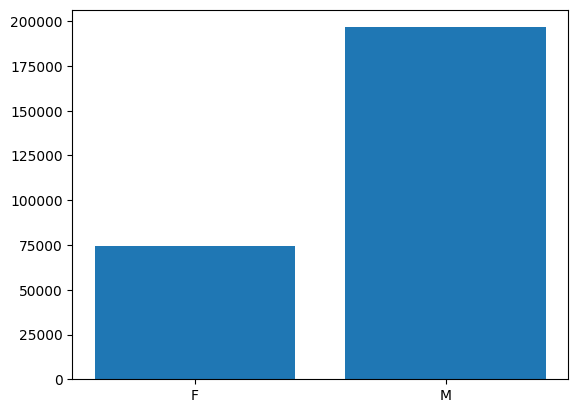

In [236]:
import matplotlib.pyplot as plt

# Könsfördelning 

sex = df2.groupby(['Sex']).size()

sex_total = sex.to_dict()

plt.bar(sex_total.keys(), sex_total.values())

<BarContainer object of 10 artists>

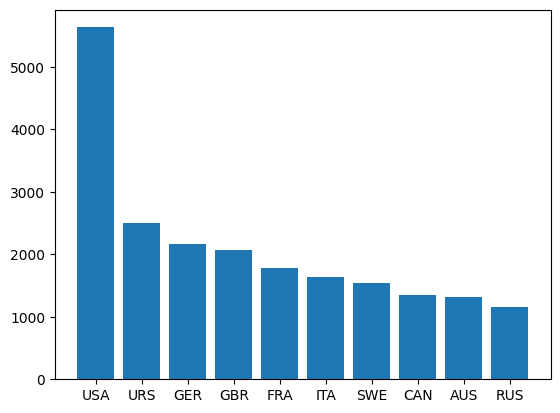

In [302]:
# h. diagram över topp 10 länder som tagit flest medaljer

medalj = df2.pivot_table(index= 'NOC', columns='Medal', aggfunc= 'size')

medalj2 = medalj.sum(axis=1)
medalj = medalj2.sort_values(ascending=False)

medalj = medalj.astype(int)
medalj.head(10)


medalj10= medalj[:10]

medalj_top_10 = medalj10.to_dict()
plt.bar(medalj_top_10.keys(), medalj_top_10.values())





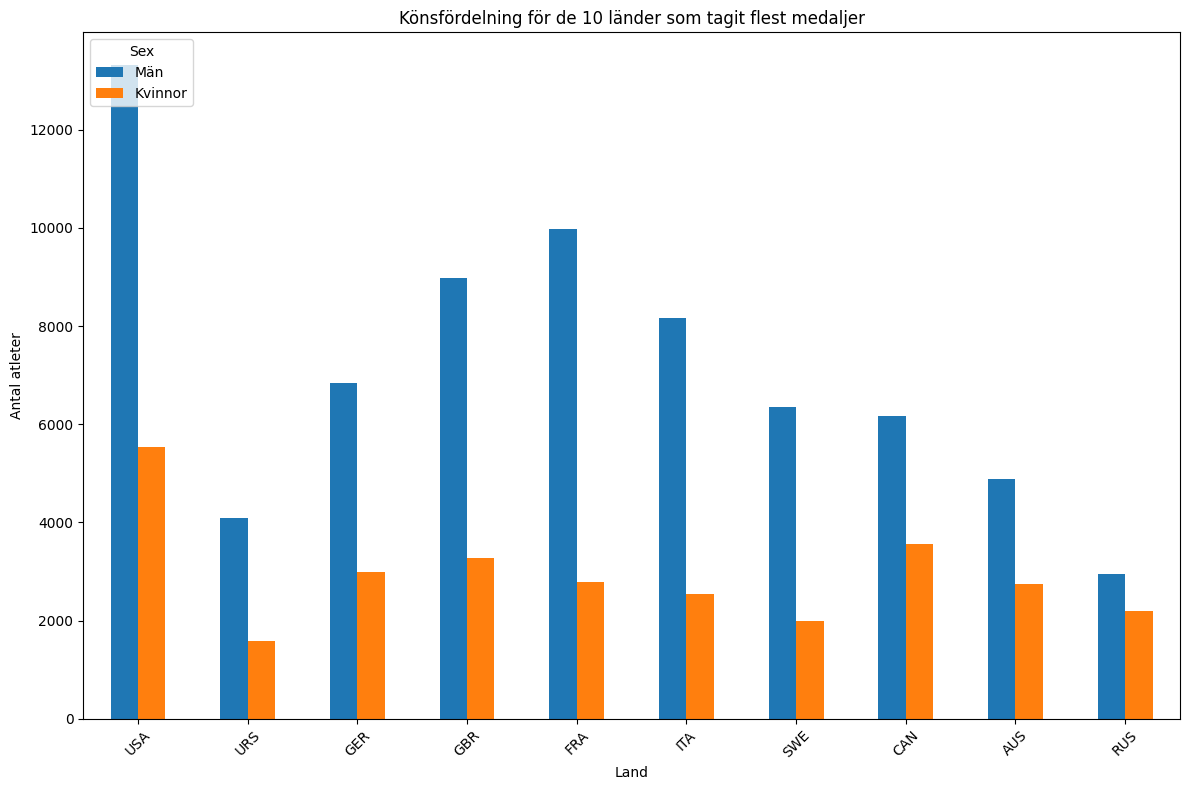

In [313]:
import matplotlib.pyplot as plt

gender_distributions = []


for country in medalj_top_10.keys():
   
    country_data = df2[df2['NOC'] == country]
    
    gender_distribution = country_data['Sex'].value_counts()
    gender_distribution = gender_distribution.reindex(['M', 'F'],)    
    gender_distributions.append(gender_distribution)


gender_df = pd.DataFrame(gender_distributions, index=medalj_top_10.keys())
gender_df.plot(kind='bar', stacked=False, figsize=(12, 8))




plt.title('Könsfördelning för de 10 länder som tagit flest medaljer')
plt.xlabel('Land')
plt.ylabel('Antal atleter')
plt.xticks(rotation=45) 
plt.legend(title='Sex', loc='upper left', labels=['Män', 'Kvinnor'])
plt.tight_layout() 
plt.show()
